In [201]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [202]:
df=pd.read_csv('companies rating.csv')
df.head()

,Unnamed: 0,company,type,rating,reviewers,age,highly_ratedFOR,critically_ratedFOR
0,0,TCS,IT Services & Consulting,3.8,73.8k Reviews,56 years old,"Job Security, Work Life Balance","Promotions / Appraisal, Salary & Benefits"
1,1,Accenture,IT Services & Consulting,4.0,46.8k Reviews,35 years old,"Company Culture, Skill Development / Learning,...",NaN
2,2,Cognizant,IT Services & Consulting,3.9,42.2k Reviews,30 years old,Skill Development / Learning,Promotions / Appraisal
3,3,Wipro,IT Services & Consulting,3.8,39.6k Reviews,79 years old,Job Security,"Promotions / Appraisal, Salary & Benefits"
4,4,Capgemini,IT Services & Consulting,3.9,34.3k Reviews,57 years old,"Job Security, Work Life Balance, Skill Develop...","Promotions / Appraisal, Salary & Benefits"


In [203]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [204]:
df.head()

,company,type,rating,reviewers,age,highly_ratedFOR,critically_ratedFOR
0,TCS,IT Services & Consulting,3.8,73.8k Reviews,56 years old,"Job Security, Work Life Balance","Promotions / Appraisal, Salary & Benefits"
1,Accenture,IT Services & Consulting,4.0,46.8k Reviews,35 years old,"Company Culture, Skill Development / Learning,...",NaN
2,Cognizant,IT Services & Consulting,3.9,42.2k Reviews,30 years old,Skill Development / Learning,Promotions / Appraisal
3,Wipro,IT Services & Consulting,3.8,39.6k Reviews,79 years old,Job Security,"Promotions / Appraisal, Salary & Benefits"
4,Capgemini,IT Services & Consulting,3.9,34.3k Reviews,57 years old,"Job Security, Work Life Balance, Skill Develop...","Promotions / Appraisal, Salary & Benefits"


In [205]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   company              10000 non-null  object 
 1   type                 9591 non-null   object 
 2   rating               10000 non-null  float64
 3   reviewers            10000 non-null  object 
 4   age                  9211 non-null   object 
 5   highly_ratedFOR      9916 non-null   object 
 6   critically_ratedFOR  2824 non-null   object 
dtypes: float64(1), object(6)
memory usage: 547.0+ KB


In [206]:
df['reviewers'].unique()

array(['73.8k Reviews', '46.8k Reviews', '42.2k Reviews', '39.6k Reviews',
       '34.3k Reviews', '33.8k Reviews', '32.1k Reviews', '28.9k Reviews',
       '27.9k Reviews', '26.5k Reviews', '22.2k Reviews', '22k Reviews',
       '20.8k Reviews', '20.7k Reviews', '19.9k Reviews', '19k Reviews',
       '18.3k Reviews', '16.8k Reviews', '15.5k Reviews', '14.7k Reviews',
       '14.4k Reviews', '14k Reviews', '13.8k Reviews', '13.6k Reviews',
       '12.4k Reviews', '10.6k Reviews', '9.8k Reviews', '9.4k Reviews',
       '9.3k Reviews', '9k Reviews', '8.8k Reviews', '8.4k Reviews',
       '8.3k Reviews', '7.9k Reviews', '7.8k Reviews', '7.6k Reviews',
       '7.1k Reviews', '6.8k Reviews', '6.7k Reviews', '6.6k Reviews',
       '6.5k Reviews', '6.4k Reviews', '6.2k Reviews', '6k Reviews',
       '5.9k Reviews', '5.7k Reviews', '5.6k Reviews', '5.5k Reviews',
       '5.4k Reviews', '5.3k Reviews', '5.2k Reviews', '5.1k Reviews',
       '5k Reviews', '4.9k Reviews', '4.8k Reviews', '4.6k Re

In [207]:
def reviews(reviewers):
    if isinstance(reviewers,float):
        return reviewers
    elif "k Reviews" in reviewers:
        return int(float(reviewers.replace('k Reviews',''))*1000)
    elif "Reviews" in reviewers:
        return int(reviewers.replace('Reviews',''))
    return reviewers

In [208]:
df['reviewers']=df['reviewers'].apply(reviews)

In [209]:
df['reviewers'].head()

0    73800
1    46800
2    42200
3    39600
4    34300
Name: reviewers, dtype: int64

In [210]:
df['reviewers'].unique()

array([73800, 46800, 42200, 39600, 34300, 33800, 32100, 28900, 27900,
       26500, 22200, 22000, 20800, 20700, 19900, 19000, 18300, 16800,
       15500, 14700, 14400, 14000, 13800, 13600, 12400, 10600,  9800,
        9400,  9300,  9000,  8800,  8400,  8300,  7900,  7800,  7600,
        7100,  6800,  6700,  6600,  6500,  6400,  6200,  6000,  5900,
        5700,  5600,  5500,  5400,  5300,  5200,  5100,  5000,  4900,
        4800,  4600,  4500,  4400,  4300,  4200,  4100,  4000,  3900,
        3800,  3700,  3600,  3500,  3400,  3300,  3200,  3100,  3000,
        2900,  2800,  2700,  2600,  2500,  2400,  2300,  2200,  2100,
        2000,  1900,  1800,  1700,  1600,  1500,  1400,  1300,  1200,
        1100,  1000,   997,   994,   989,   987,   986,   984,   981,
         980,   979,   978,   977,   976,   974,   972,   969,   968,
         960,   958,   957,   956,   954,   952,   951,   947,   945,
         943,   940,   939,   937,   936,   934,   933,   931,   929,
         928,   927,

In [211]:
df['reviewers']=df['reviewers'].astype(int)

In [212]:
(df.isnull().sum()*100/len(df)).sort_values(ascending=False)

critically_ratedFOR    71.76
age                     7.89
type                    4.09
highly_ratedFOR         0.84
company                 0.00
rating                  0.00
reviewers               0.00
dtype: float64

In [213]:
df['critically_ratedFOR'].fillna(df['critically_ratedFOR'].mode()[0],inplace=True)

In [214]:
df['age'].unique()

array(['56 years old', '35 years old', '30 years old', '79 years old',
       '57 years old', '43 years old', '33 years old', '38 years old',
       '27 years old', '31 years old', '46 years old', '41 years old',
       '17 years old', '113 years old', '18 years old', '86 years old',
       '6 years old', '13 years old', '21 years old', '179 years old',
       '47 years old', '24 years old', '29 years old', '28 years old',
       '22 years old', '7 years old', '25 years old', '26 years old',
       '144 years old', '159 years old', '55 years old', '148 years old',
       '45 years old', '20 years old', '82 years old', '89 years old',
       '40 years old', '14 years old', '23 years old', '36 years old',
       '37 years old', '129 years old', '48 years old', '117 years old',
       '172 years old', '72 years old', nan, '80 years old',
       '152 years old', '114 years old', '8 years old', '34 years old',
       '42 years old', '85 years old', '12 years old', '76 years old',
       '17

In [215]:
def company_age(Age):
    if isinstance(Age,int):
        return Age
    elif isinstance(Age,float):
        return Age
    elif "years old" in Age:
        return int((Age.replace('years old','')))
    return Age
df['age']=df['age'].apply(company_age)

In [216]:
df.age

0       56.0
1       35.0
2       30.0
3       79.0
4       57.0
        ... 
9995    52.0
9996    28.0
9997    19.0
9998    10.0
9999    14.0
Name: age, Length: 10000, dtype: float64

<Axes: >

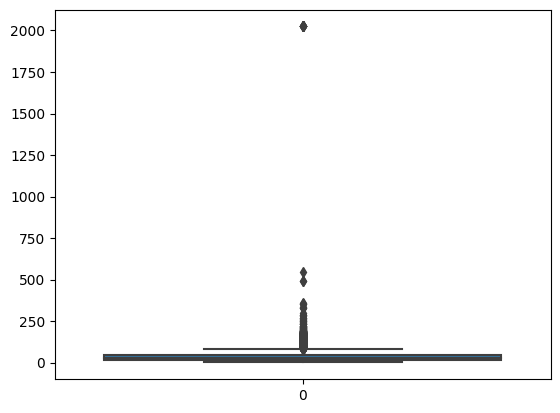

In [217]:
sns.boxplot(df.age)

In [218]:
df.dropna(inplace=True)

In [219]:
# Assuming df is your DataFrame
median_age = df['age'].median()  # Calculate median age
df['age']=df['age'].replace(2024,median_age)


In [220]:
df['age']=df['age'].astype(int)

In [221]:
df.age.unique()

array([ 56,  35,  30,  79,  57,  43,  33,  38,  27,  31,  46,  41,  17,
       113,  18,  86,   6,  13,  21, 179,  47,  24,  29,  28,  22,   7,
        25,  26, 144, 159,  55, 148,  45,  20,  82,  89,  40,  14,  23,
        36,  37, 129,  48, 117, 172,  72,  80, 152, 114,  34,  42,  85,
        12,  76, 177,  15, 171,  75,   9,  44, 138,  11, 118,  10, 218,
       178,   4, 137, 123,  66, 127,  32,  58, 154,   8,  16,  39, 136,
        65, 121,  70, 105, 174,  94,  92, 334, 101, 120,  49, 139,  78,
        81,  19, 140,  50,  88,  59, 164,  53,  96,  52, 100,  64, 232,
        69,  77,  51, 132, 128,   3,  83, 115, 167,  95,  68,  54, 104,
        60,  99,  73, 194,  62,  97, 196,  63,  67, 116,  84,  74, 212,
        71,  61, 160, 187,  90,  91, 168, 359,  93, 156,  87, 176,  98,
       109, 106, 125,   5, 130, 135, 153, 158, 161, 143, 108, 142, 328,
       126, 134, 165, 151, 102, 222, 162, 122, 145, 186,   1, 155, 103,
       326, 170, 107, 200, 204, 209, 190, 112, 266,   2, 188, 18

In [222]:
df.duplicated().sum()

803

In [223]:
df.drop_duplicates(inplace=True)

In [224]:
df.groupby('company')['age'].apply(lambda x: x[x >= 50])

company                      
11:11 Systems            3924     56
3F Industries            6152     64
A. Menarini India        6726    138
A.K.AUTOMATICS           7150     55
A.O. Smith               4386    150
                                ... 
Zebra Technologies       6882     55
Zuari Agro Chemicals     3982     57
Zydus Lifesciences       70       72
Zydus Takeda Healthcare  9854    243
le méridien              1629     52
Name: age, Length: 1755, dtype: int32

In [225]:
df.groupby('company')['rating'].apply(lambda x:x[x>=4])

company                                  
11:11 Systems                        3924    4.0
20 Microns                           7964    4.1
21K School                           8462    4.0
3F Industries                        6152    4.0
3M                                   1507    4.3
                                            ... 
le méridien                          1629    4.1
mPokket                              1374    4.3
vista Processed foods (A OSI GROUP)  9996    4.0
Škoda Auto India                     3687    4.3
Škoda Auto Volkswagen                1891    4.3
Name: rating, Length: 3999, dtype: float64

In [226]:
df['old_company']=df['age']>=50

In [227]:
df['high_rating']=df['rating']>=4.0

In [228]:
df['age'].unique()

array([ 56,  35,  30,  79,  57,  43,  33,  38,  27,  31,  46,  41,  17,
       113,  18,  86,   6,  13,  21, 179,  47,  24,  29,  28,  22,   7,
        25,  26, 144, 159,  55, 148,  45,  20,  82,  89,  40,  14,  23,
        36,  37, 129,  48, 117, 172,  72,  80, 152, 114,  34,  42,  85,
        12,  76, 177,  15, 171,  75,   9,  44, 138,  11, 118,  10, 218,
       178,   4, 137, 123,  66, 127,  32,  58, 154,   8,  16,  39, 136,
        65, 121,  70, 105, 174,  94,  92, 334, 101, 120,  49, 139,  78,
        81,  19, 140,  50,  88,  59, 164,  53,  96,  52, 100,  64, 232,
        69,  77,  51, 132, 128,   3,  83, 115, 167,  95,  68,  54, 104,
        60,  99,  73, 194,  62,  97, 196,  63,  67, 116,  84,  74, 212,
        71,  61, 160, 187,  90,  91, 168, 359,  93, 156,  87, 176,  98,
       109, 106, 125,   5, 130, 135, 153, 158, 161, 143, 108, 142, 328,
       126, 134, 165, 151, 102, 222, 162, 122, 145, 186,   1, 155, 103,
       326, 170, 107, 200, 204, 209, 190, 112, 266,   2, 188, 18

In [229]:
px.density_heatmap(df,x=df['company'],y=df['high_rating'])

In [230]:
px.scatter(df['old_company'],x=df['company'],y=df['age'],color=df['high_rating'])

In [231]:
df.to_csv('company_rating.csv')